# Response Themes for "What, if anything, hinders you from making Jupyter Notebook an even more regular part of your workflow?"

* Goal: Extract theme keywords from `hinderances`, `integrations`, `workflow_needs_addressed`, `workflow_needs_not_addressed` responses.
* Data: Output from 2_clean_survey.ipynb notebook (`survey_short_columns.csv`)
* Process from [1_ux_survey_review.ipynb](1_ux_survey_review.ipynb):

> Moving forward, here's a semi-automatic procedure we can follow for identifying themes across questions:
> 1. Take a random sample of question responses
> 2. Write down common theme keywords
> 3. Search back through the responses using the theme keywords
> 4. Expand the set of keywords with other words seen in the search results
> 5. Repeat for all themes and questions
> Later, we can use a fully automated topic modeling approach to validate our manually generated themes.

In [1]:
%matplotlib inline

/opt/conda/lib/python3.4/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/opt/conda/lib/python3.4/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
import pandas as pd
import numpy as np

Make sure the samples come up the same for anyone that re-runs this.

In [3]:
rs = np.random.RandomState(123)

In [4]:
pd.set_option('max_colwidth', 1000)

In [5]:
df = pd.read_csv('survey_short_columns.csv')

In [6]:
def show(series):
    '''Make random samples easier to read.'''
    for i, value in enumerate(series):
        print('{}) {}'.format(i, value), end='\n\n')

In [7]:
responses = df.hinderances

In [8]:
responses.isnull().value_counts()

True     943
False    763
Name: hinderances, dtype: int64

In [9]:
responses = responses.dropna()

## Initial Samples

I ran the sampling code below 6 times and manually built up the initial set of keywords seen commonly across them. I formed groups of conceptually related keywords. Then I tried to assign a simple label to each group.

In [10]:
show(responses.sample(20, random_state=rs))

0) Jupyter Notebook "Windows 7+" experience is inferior to Linux one

1) Integration with text editor 

2) Version control (and, which is related, collaborative version control).

3) Doesn't seem to fit with building a large project, prefer IDE

4) remembering how to get it setup

5) better connections to external DBs, easier interact widgets.

6) Primarily use R, Rstudio is better for R.

7) * a "clear and run all" button to get rid of variable persistence (possible with Kernel > Clear all then run but that's more clicks) * a IPython notebook .app -- it'd be really nice to double click on a notebook and have it open

8) School assignments

9) In ML, I have a cell output the loss at each epoch or few thousand iterations. This makes the output really long and to go between cells I have to scroll a lot to get past the wall of text I made.

10) The notebook workflows are very linear, doing experiments is difficult. Also some source control/diff tool would be really nice.

11) - Better edi

In [11]:
themes = {
    'version' : ['version control', 'diff', 'source control', 'git'],
    'collab': ['shar(e|ing)', 'collab'],
    'development' : ['text editor', 'ide(\W|$)', 'vim', 'emacs', 'editing',
                     'key binding', 'key mapping', 'keyboard', 'shortcuts',
                     'debug', 'programming', 'widgets', 'view', 'interact', 
                     'dataframes', 'ui', 'design', 'linear', 'search', 'theme', 
                     'collapse',  'organization', 'proliferation', 'cut', 
                     'merge', 'completion', 'aesthetic', 'scroll'],
    'setup' : ['setup', 'desktop', 'install', 'documentation', 'kernels', 
               'customization', 'windows'],
    'integrations' : ['connections', 'db', 'rstudio'],
    'language': ['clojure', 'scala', 'c#', 'r(\W|$)'],
    'disseminate' : ['publication', 'export', 
                     'deploy', 'authoring', 'dashboard', 'latex', 'slides'],
    'reuse': ['reuse', 'module', 'cron'],
    'robust' : ['stability', 'crash', 'reload', 'bug', 'reliability', 
                'windows', 'ipad', 'slow', 'performance']
}

## Coverage Improvement

I next ran the code below to associate the theme labels with the responses. I then iterated on running the code below to find reponses without labels. I expanded the list of keywords and themes in order to improve coverage.

In [12]:
import re

In [13]:
def keywords_or(text, keywords):
    for keyword in keywords:
        if re.search('(^|\W+){}'.format(keyword), text, re.IGNORECASE):
            return True
    return False

In [14]:
def tag_themes(responses, themes):
    tagged = responses.to_frame()
    tagged['themes'] = ''
    for theme, keywords in themes.items():
        results = responses.map(lambda text: keywords_or(text, keywords))
        tagged.loc[results, 'themes'] += theme + ','
        print(theme, results.sum())
    return tagged

In [15]:
tagged = tag_themes(responses, themes)
tagged.themes.str.count(',').value_counts()

collab 55
disseminate 48
robust 44
integrations 16
setup 89
reuse 30
development 275
language 23
version 139


1    294
0    286
2    138
3     31
4     14
Name: themes, dtype: int64

In [16]:
tagged[tagged.themes.str.len() == 0].sample(20, random_state=rs)

,hinderances,themes
1192,I prefer Juliabox which I don't need to administer and is in the cloud.,
1359,Some things just work more efficiently for me to script directly in Python.,
885,I don't need it more often,
196,I use it for hobby projects and only rarely at work. For scientific hobby prokects I use it extensively.,
1253,I use it heavily to do exploratory data analysis. I conduct trainings often & feel Jupyter is the best way to do it.,
956,Better integration with batch-based computing clusters,
1384,"Nothing really, it's already pretty frequent.",
542,The requirement for sequential execution of cells and no concepts of 'modulazation' (call cell x in notebook y) means it is always somewhat cumbersome to use if you are doing anything complicated. But mostly the reluctance of others to use it.,
824,Multiple checkpoints for notebooks,
1474,Lack of proper equation numbering and referencing (same for table of contents etc).,


In [17]:
themes = {
 'collab': ['concurrent', 'multi-?user', 'shar(e|ing)', 'simultaneous', 'collab'],
 'development': ['visualization', 'applications', 'develop', 'design',
    'format', 'development', 'polyglot', 'key mapping', 'data creat', 'programming',
    'completion', 'variable', 'test', 'proliferation', 'linear', 'literate', 'key binding',
    'scroll', 'theme', 'integrat(ing|ion)', 'filing', 'packages', 'parallel',
    'view', 'plot', 'vim', 'data entry', 'edit(ing|or)', 'debug', 'ui', 'search',
    'organization', 'lint', 'cut', 'browse', 'intellisense', 'spell check',  
    'shortcuts', 'ide(\W|$)', 'diagram', 'script', 'compiler', 'dataframes', 'graphic',
    'input', 'complet(e|ion)', 'project', 'merge', 'keyboard', 'branch',
    'aesthetic', 'visual', 'collapse', 'widgets', 'emacs', 'interact', 'organi(s|z)',
    'refactor', 'workspace', 'notes', 'clutter', 'interface', 'understand'],
 'disseminate': ['distribution', 'gui', 'authoring', 'writing', 'story', 'textbook', 
    'deploy', 'standalone', 'books', 'manuscript', 'paper', 'send', 'web', 'publi(sh|cation)',
    'product(ion|i(s|z)ation)', 'app(s|lication)', 'push', 'present', 'export', 'blog', 'embed',
    'report', 'pages', 'latex', 'bundle', 'dashboard', 'publication', 'bibliograph',
    'citation', 'slides', 'document', 'business', 'documents', 'transition'],
 'integrations': ['spark', 'db', 'connections', 'd3', 'rstudio', 'fenics', 'sas', 'conda',
    'native', 'pentadactyl', 'sheets', 'in-house', 'django', 'ubuntu', 'excel'],
 'language': ['sage', 'c#', 'scala', 'perl', 'clojure', 'haskell', 'sql', 'julia',
    'r($|\W)', 'matlab', 'fortran', 'c\+\+', 'r(\W|$)', 'ruby', 'javascript'],
 'reuse': ['modul(e|ar)', 'parameter', 'complicate', 'reuse', 'package', 'cron', 'large',
    'schedule', 'maintain', 'serious', 'long', 'automat(e|ing|ion)', 'reus(e|able)', 'portab',
    'manag(e|ing)', 'librar(y|ies)', 'repeat', 'reproduc', 'complex', 'clean', 'DRY',
    'batch'],
 'robust': ['bug', 'reliability', 'performance', 'ipad', 'stability', 'speed', 'slow',
    'error', 'windows', 'crash', 'reload'],
 'setup': ['hosted', 'startup', 'environ', 'customization', 'documentation', 'install',
    'setup', 'customi(s|z)', 'backup', 'kernels', 'storage', 'theme', 'provision', 'config',
    'turn-key', 'server', 'cost', 'access', 'mobile', 'desktop', 'windows', 'state'],
 'version': ['history', 'hg', 'diff(\W|$)', 'provenance', 'vcs', 'git', 'tracking', 'version',
    'change ?log'],
 'external' : ['legacy', 'acceptance', 'compliance', 'adoption', 'habit', 'relevant'
    'nobody', 'policy', 'inertia', 'team', 'people', 'colleague'],
 'nothing': ['nothing', 'no need']
}

## Precision Check

I then studied a sample of responses for each theme to see if there major inaccuracies in their application (e.g., string matches that are too fuzzy).

In [18]:
tagged = tag_themes(responses, themes)
tagged.themes.str.count(',').value_counts()

collab 63
disseminate 146
robust 51
external 35
integrations 43
reuse 136
setup 148
development 425
language 58
nothing 33
version 116


1    308
2    220
0     94
3     88
4     31
5     14
6      8
Name: themes, dtype: int64

In [19]:
from IPython.display import display, clear_output

In [20]:
for key in themes:
    clear_output()
    display(tagged[tagged.themes.str.contains(key)].sample(10))
    if input('Showing `{}`. Type Enter to continue, "q" to stop.'.format(key)) == 'q':
        break

,hinderances,themes
1239,"Interactive plot exploration (through matplotlib) is a bit clunky and much worse than in Matlab, for example. You basically need to modify the code that you used to create a plot and rerun its cell in order to modify the plot. Embedded plots are not interactive and regular matplotlib figures are not that dynamic to begin with. You can zoom and pan but you cannot modify them in any other way (e.g. you cannot select a plot element and modify its color, delete it or add a fitting curve as in Matlab). Some of these are limitations of matplotlib of course but that is part of the whole ""Jupyter package"". Creating interactive plots and widgets is too complicated at the moment. It requires too much programming. It is hard to generate a nice report that you can share with non technical people from a Jupyter notebook because there is no way (AFAIK) to hide the code cells from the output. It would be cool to be able to mark a cell as ""hidden code"" which would be excluded from the generated ...","collab,disseminate,external,reuse,development,language,"
411,live collaboration features,"collab,"
718,"The workflow/interchange between notebooks and documents (such as the markdown I use to write papers) is very clunky - I end up copy-pasting text and TeX maths because the notebook isn't suitable by itself for storing documentation - there isn't a nice way to keep it all in sync. Part of this is that reading notebooks depend on running the notebook server and viewing in a browser, making them unsuitable for sharing and archiving (since you're not always sure you'll be able to load an old notebook without errors if you update packages).","collab,disseminate,robust,reuse,setup,development,"
1216,More control over look and feel Collaboration with other team memebers - think google docks style,"collab,external,"
508,"Version controlling the notebooks is challenging: it is difficult to see what has actually changed. This also makes collaborating inside a single notebook challenging, because changes made by another person are not transparent. I also use the notebook as a platform for distributing interactive demos for students (using the widgets!). This has been a great resource for getting simulation tools in the hands of students. However, at this point, the upstart for them is still tough. These students have no programming experience, and we are leveraging the notebook as a rapid way to build interactive simulations. If we could easily run them live on the web (not having to have students download, install python etc.) that would be huge! To lower the barriers even further, if we could easily hide the code and execute on startup (essentially using it as a gui), that would be nice.","collab,disseminate,setup,development,version,"
1243,"1. The integration of matplotlib could be better. E.g. resizing of a graph still does not trigger a redraw, and is not stored for the next run of this code cell. 2. A basic version of shared notebooks would be great. Of course, real time collaboration at one notebook would be best, but running notebooks on different machines, and tracking individual changes would be a great first step, thaat, I think, is much easier to realize, and almost as helpful. 3. Some lightweight admin level for code cells (run, delete, move cell groups). Probably possible to combine this in a reasonable way with some structure of the notebook.","collab,development,version,"
525,Most of the time I prefer working with the ipython shell directly. I use the notebook when I intend to share with others.,"collab,"
1378,"lack of copy/paste between notebooks, lack of simultaneous multi-user access to notebooks (multi-cursor), as well viewing/working on the same notebook in multiple places (e.g. two side-by-side browser windows); missing undo, poor source code editing environment compared to vim/tmux,","collab,robust,setup,development,"
712,"I use it a lot already, but would use it even more if I had a way to manage noteb

Showing `collab`. Type Enter to continue, "q" to stop.q


## Keyword Frequencies

In [21]:
import matplotlib
import seaborn

In [22]:
counts = {}

In [23]:
for theme, keywords in themes.items():
    for keyword in keywords:
        hits = responses.map(lambda text: keywords_or(text, [keyword]))
        counts[keyword] = hits.sum()

In [24]:
hist = pd.Series(counts).sort_values()

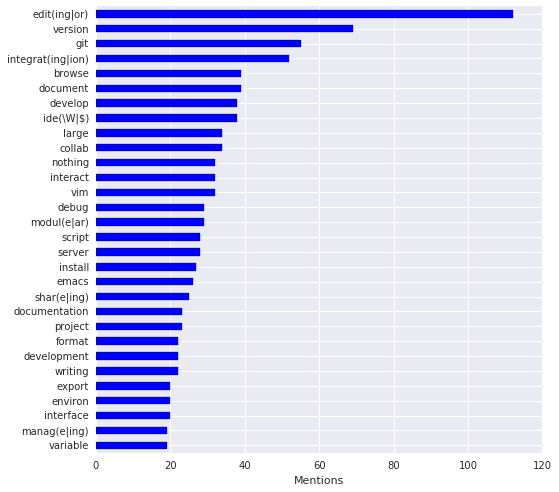

In [25]:
ax = hist[-30:].plot.barh(figsize=(8, 8))
_ = ax.set_xlabel('Mentions')

## Topic Model

The manual tagging above is but one way of breaking down the responses into themes. I wanted to try another approach as validation. So I experimented with LSA and clustering to see how they would group responses.

After searching over the number of topics and clusters, I do see some themes like "version control" and "text editing" emerge. With nearly all settings, some large clusters remain that seem to be a grab bag of topics.

Prerequisites:

* gemsim 0.12.2

In [28]:
import gensim
import string
import requests

In [29]:
texts = gensim.parsing.preprocess_documents(responses)

In [30]:
dictionary = gensim.corpora.Dictionary(texts)

In [31]:
corpus = [dictionary.doc2bow(text) for text in texts]

In [32]:
tfidf = gensim.models.TfidfModel(corpus)

In [33]:
corpus_tfidf = tfidf[corpus]

In [34]:
import sklearn.datasets
import sklearn.metrics as metrics
from sklearn.cluster import KMeans, DBSCAN
from gensim.matutils import corpus2csc

I informally experimented with the topic and cluster counts for quite some time, looking at the inertia graph and the resulting cluster sizes.

In [35]:
# set the number of clusters, must be >=1
topics_n = 10
clusters_n = 10

In [38]:
import matplotlib.pyplot as plt
import math

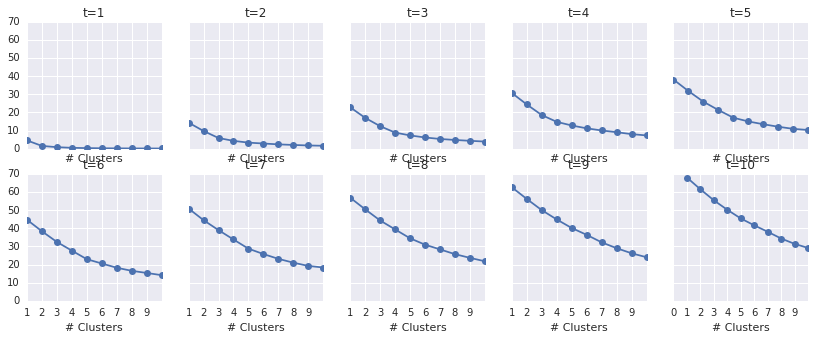

In [39]:
fig, axes = plt.subplots(math.ceil(topics_n / 5), 5, sharex=True, sharey=True, figsize=(14, 5))

for t in range(1, topics_n+1):
    inertia = [np.NaN]
    lsi = gensim.models.LsiModel(corpus_tfidf, id2word=dictionary, num_topics=t)
    corpus_lsi = lsi[corpus_tfidf]
    X = corpus2csc(corpus_lsi).transpose()
    
    for k in range(1,clusters_n+1):
        k_means = KMeans(n_clusters=k)
        k_means.fit(X)
#         print('k = %d, inertia= %f' % (k, k_means.inertia_ ))
        inertia.append(k_means.inertia_)

    ax = axes[(t-1) // 5][(t-1) % 5]
    ax.plot(inertia, '-o')
    ax.set_xticks(range(clusters_n))
    ax.set_title('t=%d' % t)
#     ax.set_ylabel('Inertia')
    ax.set_xlabel('# Clusters')

Here's 4 topics, 10 clusters.

In [40]:
lsi = gensim.models.LsiModel(corpus_tfidf, id2word=dictionary, num_topics=4)
corpus_lsi = lsi[corpus_tfidf]
X = corpus2csc(corpus_lsi).transpose()
k_means = KMeans(n_clusters=10, random_state=np.random.RandomState(123))
k_means.fit(X)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=10, n_init=10,
    n_jobs=1, precompute_distances='auto',
    random_state=<mtrand.RandomState object at 0x7fb6522fcdd8>, tol=0.0001,
    verbose=0)

In [41]:
clusters = pd.Series(k_means.labels_, index=responses.index)
clusters.value_counts()

1    283
2    142
0    107
8     83
9     61
7     28
4     22
3     15
5     13
6      9
dtype: int64

In [42]:
tagged['cluster'] = clusters

Cluster 8 is about IDEs and development environments, for example.

In [44]:
tagged[tagged.cluster == 8].head(10)

,hinderances,themes,cluster
11,Browser becomes unresponsive when I start a too intensive computation. Poor integration with my preferred code editors (pycharm or vim).,"development,",8
23,"IDE capabilities: debugging UI, refactorings,...","development,",8
37,"I want Jupyter to act like a normal text editor app in which I can easily open files, without the hassle of starting it from the console in the right place. Simple double click opening for all ipynbs please","development,",8
43,"Give notebooks more editors/ide functionnality: easier file browsing, editing, serach and replace...","development,",8
52,Code editing is inferior to IDEs,"development,",8
119,"I prefer developing in a full IDE, like PyCharm.","development,",8
123,It doesn't work well with standard version control tools because one line of code doesn't correspond to one line in the notebook file It throws away 30 years of text editor development by replacing a real editor like vim or emacs with a HTML text area.,"development,version,",8
128,"Number one complaint I have had is the lack of find and replace, autocomplete, and other text-editor style tools. I understand this may not really be the point of jupyter nootbooks, but I find myself cutting code, pasting to a text editor, and pasting back in all the time. In my limited experience (could easily be wrong about this), it doesn't have great integration with virtualenv, so it's a bit of a headache to switch from one env to another and reconfigure jupyter. On the nitpick side, translation of magic commands to equivalent python commands would be amazing when exporting to a .py file.","disseminate,development,",8
134,"I prefer to use a real editor (vim, emacs) and a terminal for my Python scripts, not small boxes.","development,",8
142,moving between coding snippets in the notebook to making changes in another editor/ide.,"development,",8


Clusters 4 and 9 are about version control.

In [47]:
tagged[tagged.cluster == 9].head(10)

,hinderances,themes,cluster
26,Lack of multi-cell copy/paste (until now). Difficulties with version control and large notebooks. Poor documentation in general. Relatively frequent changes to the notebook format.,"disseminate,reuse,setup,development,version,",9
39,- tighter integration with version control - cross project/directory search of notebooks - deployable notebooks - persistent widgets,"disseminate,development,version,",9
41,Lacking nice github integration Interactive figures are cumbersome (at least I haven't found the right tools),"development,version,",9
89,"Git integration, CSS themes","setup,development,version,",9
95,I find it difficult to collaborate with colleagues who are all using Git. It is much easier to do this with plain Python files.,"collab,external,version,",9
97,"They are difficult to use with version control, and I prefer development in a text editor over development in a browser window.","development,version,",9
104,static checking of code (ala pyflakes) better integration with version control better editor inside the code blocks,"development,version,",9
105,Version control with git. Cell merging. Cell grouping and hiding. Vim key bindings.,"development,version,",9
117,- Not available on all my computing environments and I have been struggling with jupyterhub setup. - No easy workflow with a version control system such as git . Need a markup language in comments to create a mapping between notebook cells and traditional flat files. - Detect running dependencies between cells. Warn when a variable is reassigned between cells . This might indicate a cell cannot be refreshed without refreshing the previous one.,"setup,development,version,",9
118,"Challenge setting up other language integrations aside Python. I tried the IScala integration and had a lot difficulty so went back to using the normal Scala REPL. I will like to be able to use R, Julia and Scala with Jupyter eventually also.","development,language,",9


Cluster 5, the largest cluster, does not have a good separation of topics.

In [48]:
tagged[tagged.cluster == 1].head(10)

,hinderances,themes,cluster
1,Ways to hide helper function definitions (or easier ways to import functions from notebooks). But those might be bad practices,,1
5,lazyness,,1
7,"- a standard option of converting the notebook to html, pdf,... with or without code cells, input/output prompts. - easy integration in a static website (e.g. sphinx, ...) where that static website is used as a sort of reporting tool - when converting to a certain format (rst, md, ...) the rendering of the output (e.g. pandas dataframes) also in that format provided the package has implemented this (e.g. pandas dataframes: in te notebook html representation, when converted to markdown a markdown representation,...)","disseminate,reuse,development,",1
9,Maybe figure out how to schedule automated execution of notebooks?,"reuse,",1
13,My coworkers do not use them. Keybindings clash with vimperator.,"development,",1
15,Corporate IT policy Colleagues' lack of knowledge of PyData stack,"external,",1
27,Hub support for Windows. Better kernel reliability on Windows.,"robust,setup,",1
28,"Improved workflow to create reports with it. Just being able to cite papers from a bibtex file, spellchecking, reordering of chapters would be nice.","disseminate,",1
34,"Lack of proper debugging tools (comparable to e.g. Eclipse IDE, Visual Studio or Matlab).","development,language,",1
36,Doesn't interact with git too well with lots of unimportant / temporary changes distracting from the real differences in a commit.,"development,version,",1
